In [1]:
import pandas as pd
import alphalens as al
import numpy as np
from datetime import datetime
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%run get_data.ipynb

## Alpha016 (-1*rank(covariance(rank(high),rank(volume),5)))

## 1.整理原始数据

In [4]:
price_data=(kline_data[['asset', 'high_price', 'date']].pivot_table(values='high_price', index='date', columns='asset')/10000).sort_index()
volume_data=(kline_data[['asset', 'volume', 'date']].pivot_table(values='volume', index='date', columns='asset')).sort_index()

In [5]:
price_data.head()

asset,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,873122.BJ,873132.BJ,873152.BJ,873167.BJ,873169.BJ,873223.BJ,873305.BJ,873339.BJ,873527.BJ,873576.BJ
date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,19.10,28.40,21.19,2.53,5.64,6.27,2.55,7.93,4.30,12.25,...,NaN,NaN,3.25,NaN,4.0,NaN,NaN,60.0,10.98,NaN
2021-01-05,18.48,27.93,21.08,2.52,5.52,5.75,2.67,7.88,4.11,11.95,...,NaN,NaN,3.25,NaN,4.0,NaN,5.70,60.0,10.98,NaN
2021-01-06,19.56,28.75,20.85,2.48,5.45,5.34,2.72,7.83,4.20,12.14,...,NaN,NaN,3.25,NaN,4.0,NaN,5.70,60.0,10.98,NaN
2021-01-07,19.98,29.50,20.04,2.43,5.45,4.57,2.68,7.89,4.20,12.18,...,NaN,NaN,3.25,NaN,4.0,NaN,5.70,60.0,10.98,NaN
2021-01-08,20.10,29.45,19.49,2.38,5.30,4.11,2.58,7.60,4.02,11.58,...,NaN,NaN,3.25,NaN,4.0,NaN,6.66,60.0,10.98,NaN


In [6]:
volume_data.head()

asset,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,873122.BJ,873132.BJ,873152.BJ,873167.BJ,873169.BJ,873223.BJ,873305.BJ,873339.BJ,873527.BJ,873576.BJ
date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,155421643.0,146844133.0,2739801.0,4896339.0,8132668.0,850900.0,13795696.0,81454236.0,18829709.0,7027182.0,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN
2021-01-05,182135210.0,116265838.0,2304905.0,10317710.0,8532533.0,71435766.0,33215803.0,57578742.0,9823110.0,6146690.0,...,NaN,NaN,0.0,NaN,0.0,NaN,10000.0,0.0,0.0,NaN
2021-01-06,193494512.0,104880129.0,3183310.0,14822400.0,7183377.0,23693705.0,58454361.0,54967260.0,11326500.0,6987253.0,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN
2021-01-07,158418530.0,122675574.0,4119880.0,9987378.0,10809106.0,6509500.0,34215256.0,82901381.0,9650301.0,13653804.0,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN
2021-01-08,119547322.0,102856329.0,3841505.0,6593996.0,9108084.0,3607400.0,19792300.0,57526129.0,8790300.0,9798260.0,...,NaN,NaN,0.0,NaN,0.0,NaN,3101.0,0.0,0.0,NaN


## 2.定义函数

In [7]:
def rank(df):
    return df.rank(pct=True)
def covariance(x,y,window):
    return x.rolling(window).cov(y)

## 3.计算因子

In [8]:
factor_data=-1*rank(covariance(rank(price_data),rank(volume_data),5))

In [9]:
factor_data=factor_data.stack()
factor_data

date        asset    
2021-01-08  000001.SZ   -0.146444
            000002.SZ   -0.158996
            000004.SZ   -0.016736
            000005.SZ   -0.234310
            000006.SZ   -0.004184
                           ...   
2021-12-31  873223.BJ   -0.432749
            873305.BJ   -0.113445
            873339.BJ   -0.046025
            873527.BJ   -0.087866
            873576.BJ   -0.969325
Length: 1093854, dtype: float64

In [10]:
factor_data = factor_data.reset_index()
factor_data.rename(columns={0:'factor'}, inplace=True)
factor_data.head()

,date,asset,factor
0,2021-01-08,000001.SZ,-0.146444
1,2021-01-08,000002.SZ,-0.158996
2,2021-01-08,000004.SZ,-0.016736
3,2021-01-08,000005.SZ,-0.234310
4,2021-01-08,000006.SZ,-0.004184


## 4.合并数据

In [11]:
kline_data = kline_data.merge(share_data, on=['asset', 'date'])
kline_data['tcap'] = kline_data['close_price'] * kline_data['circulation_a']/10000
factor_data = factor_data.merge(kline_data[['asset', 'date', 'tcap', 'open_price', 'high_price', 'low_price', 'close_price', 'volume']], on=['asset', 'date'])
factor_data.head()
factor_data.shape[0]

1042095

In [12]:
factor_data = factor_data.merge(indus_data[['asset', 'date', 'first_industry_code']], on=['asset', 'date'])
factor_data=factor_data.merge(st_data[['asset','date','st']],on=['asset','date'])

## 5.剔除ST股票

In [13]:
factor_data = factor_data[factor_data['st'] != 1]
factor_data.head()

,date,asset,factor,tcap,open_price,high_price,low_price,close_price,volume,first_industry_code,st
0,2021-01-08,000001.SZ,-0.146444,3.852042e+11,199000.0,201000.0,193100.0,198500.0,119547322.0,40,0
1,2021-01-08,000002.SZ,-0.158996,2.850180e+11,289800.0,294500.0,288100.0,293400.0,102856329.0,42,0
2,2021-01-08,000004.SZ,-0.016736,1.612917e+09,190500.0,194900.0,180500.0,192200.0,3841505.0,35,0
3,2021-01-08,000005.SZ,-0.234310,2.507333e+09,23600.0,23800.0,23200.0,23700.0,6593996.0,20,0
4,2021-01-08,000006.SZ,-0.004184,7.051651e+09,52100.0,53000.0,50800.0,52300.0,9108084.0,42,0


## 6.剔除上市不满一年的股票

逻辑：按股票分组，获取每只股票的最早交易时间和最晚交易时间，相减得到交易总时间，不超过一年（这里设置为300天，时间更宽松一些）的剔除。

In [14]:
first_trade_dates = factor_data.groupby('asset')['date'].min()
last_trade_date = factor_data['date'].max()

trading_days = (last_trade_date - first_trade_dates).dt.days
stocks_less_than_a_year = trading_days[trading_days < 300].index

factor_data = factor_data[~factor_data['asset'].isin(stocks_less_than_a_year)]

factor_data.head()

,date,asset,factor,tcap,open_price,high_price,low_price,close_price,volume,first_industry_code,st
0,2021-01-08,000001.SZ,-0.146444,3.852042e+11,199000.0,201000.0,193100.0,198500.0,119547322.0,40,0
1,2021-01-08,000002.SZ,-0.158996,2.850180e+11,289800.0,294500.0,288100.0,293400.0,102856329.0,42,0
2,2021-01-08,000004.SZ,-0.016736,1.612917e+09,190500.0,194900.0,180500.0,192200.0,3841505.0,35,0
3,2021-01-08,000005.SZ,-0.234310,2.507333e+09,23600.0,23800.0,23200.0,23700.0,6593996.0,20,0
4,2021-01-08,000006.SZ,-0.004184,7.051651e+09,52100.0,53000.0,50800.0,52300.0,9108084.0,42,0


## 7.剔除停牌股票和一字涨跌停股票

逻辑：找到开高低收相等并且交易量为0的条件以及高开低收相等的条件，过滤。

In [15]:
def filter_stocks(row):
    # 停牌股票
    halted_stock = (row['open_price'] == row['high_price'] == row['low_price'] == row['close_price']) and (row['volume'] == 0)
    # 一字涨跌停股票
    limit_up_down_stock = row['open_price'] == row['high_price'] == row['low_price'] == row['close_price']
    return halted_stock or limit_up_down_stock


factor_data = factor_data[~factor_data.apply(filter_stocks, axis=1)]

columns_to_drop = ['open_price', 'high_price', 'low_price', 'close_price', 'volume']
factor_data = factor_data.drop(columns=columns_to_drop)

factor_data.head()

,date,asset,factor,tcap,first_industry_code,st
0,2021-01-08,000001.SZ,-0.146444,3.852042e+11,40,0
1,2021-01-08,000002.SZ,-0.158996,2.850180e+11,42,0
2,2021-01-08,000004.SZ,-0.016736,1.612917e+09,35,0
3,2021-01-08,000005.SZ,-0.234310,2.507333e+09,20,0
4,2021-01-08,000006.SZ,-0.004184,7.051651e+09,42,0


## 8.缺失值处理

逻辑：金融数据信噪比很低，实务操作中一般会丢弃空值，所以只要有缺失值就剔除

In [16]:
factor_data = factor_data.dropna()
factor_data.shape[0]

932897

## 9.去极值，标准化，中性化

逻辑：在pre-process.ipynb文件里

In [17]:
%run pre-process.ipynb

In [18]:
factor_data = adjust2(factor_data.copy())

In [19]:
factor_data.head()

,date,asset,factor
0,2021-01-08,000001.SZ,0.972785
1,2021-01-08,000002.SZ,0.953857
2,2021-01-08,000004.SZ,1.408804
3,2021-01-08,000005.SZ,0.596000
4,2021-01-08,000008.SZ,-0.855293


In [20]:
factor_data = factor_data.set_index(['date', 'asset'])['factor']
factor_data

date        asset    
2021-01-08  000001.SZ    0.972785
            000002.SZ    0.953857
            000004.SZ    1.408804
            000005.SZ    0.596000
            000008.SZ   -0.855293
                           ...   
2021-12-31  688699.SH    0.496881
            688777.SH    1.073140
            688788.SH   -0.568613
            688819.SH    0.967234
            688981.SH    1.008171
Name: factor, Length: 925086, dtype: float64

In [21]:
factor_data.to_csv('factor_data016.csv')

## 10.整理数据

In [22]:
factor_data = al.utils.get_clean_factor_and_forward_returns(
                                              factor_data,
                                              price_data,
                                              groupby=None,
                                              binning_by_group=False,
                                              quantiles=5,
                                              bins=None,
                                              periods=(1, 5, 10),
                                              filter_zscore=20,
                                              groupby_labels=None,
                                              max_loss=0.35,
                                              zero_aware=False)

Dropped 4.2% entries from factor data: 4.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [23]:
factor_data

1D        5D       10D    factor  factor_quantile
date       asset                                                             
2021-01-08 000001.SZ  0.026866  0.092040  0.105970  0.972785                5
           000002.SZ  0.030560  0.043463  0.016978  0.953857                5
           000004.SZ -0.016932 -0.036429  0.041047  1.408804                5
           000005.SZ -0.004202 -0.042017 -0.025210  0.596000                4
           000008.SZ -0.007752  0.034884  0.023256 -0.855293                2
...                        ...       ...       ...       ...              ...
2021-12-17 688699.SH -0.023366 -0.110829 -0.126299  0.784183                4
           688777.SH -0.055781 -0.068458 -0.027510  0.962611                5
           688788.SH -0.041452 -0.031913 -0.009538  1.171172                5
           688819.SH -0.018675 -0.040907 -0.046687  1.012152                5
           688981.SH -0.008537 -0.015590 -0.007981 -0.724171                2

[886256 rows x 5 columns]

## 11.获取IC序列

In [24]:
from alphalens import performance as perf
ic = perf.factor_information_coefficient(factor_data)
ic.head()

,1D,5D,10D
date,,,
2021-01-08,-0.115038,-0.057021,0.004356
2021-01-11,-0.109694,-0.047240,-0.042831
2021-01-12,-0.025899,-0.062945,-0.052729
2021-01-13,-0.120942,-0.089114,-0.084570
2021-01-14,0.046475,0.045232,0.047089


In [25]:
ic.to_csv('ic016.csv')

## 12.IC分析

Information Analysis


,1D,5D,10D
IC Mean,-0.029,-0.005,-0.002
IC Std.,0.054,0.049,0.047
Risk-Adjusted IC,-0.534,-0.109,-0.050
t-stat(IC),-8.084,-1.654,-0.752
p-value(IC),0.000,0.100,0.453
IC Skew,0.045,0.045,0.074
IC Kurtosis,-0.427,-0.242,0.156


<Figure size 640x480 with 0 Axes>

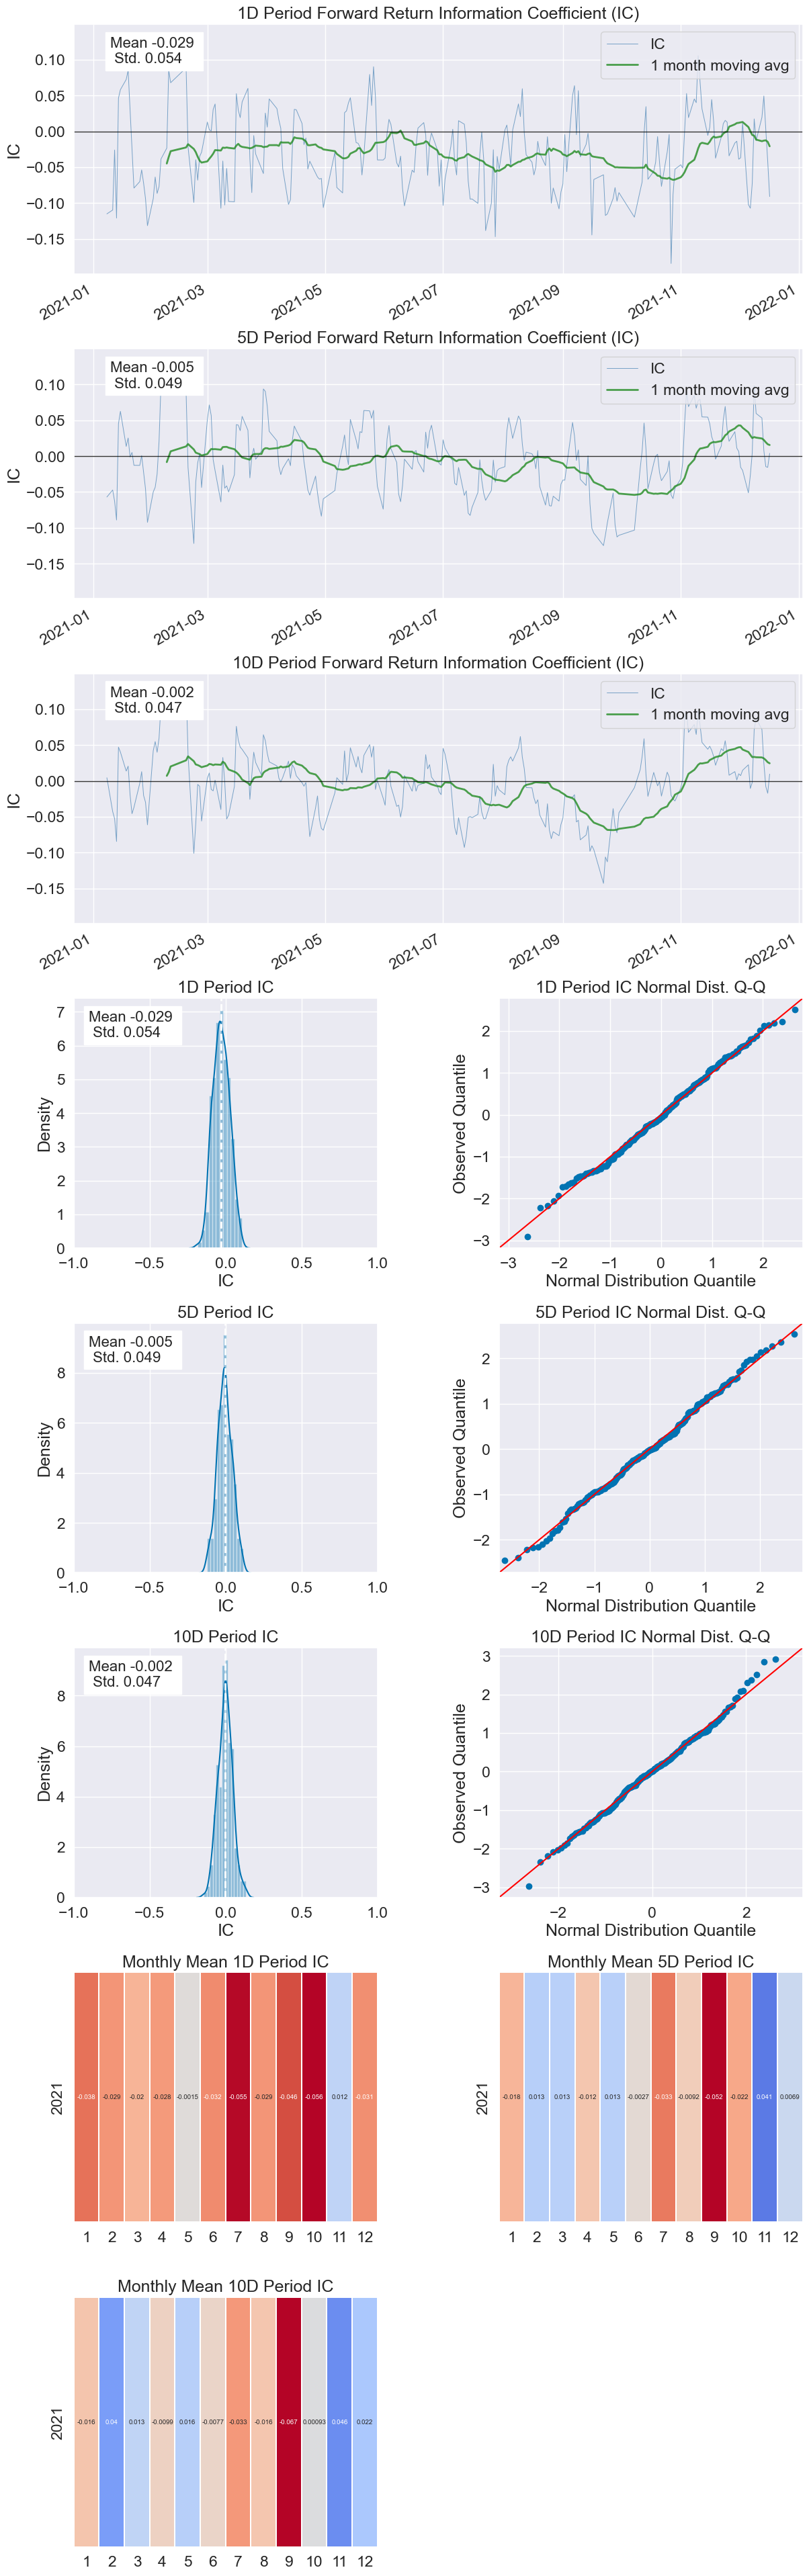

In [24]:
al.tears.create_information_tear_sheet(factor_data,
                                       group_neutral=False,
                                       by_group=False)

## 13.收益率分析

Returns Analysis


,1D,5D,10D
Ann. alpha,-0.259,-0.060,-0.031
beta,0.086,0.073,0.052
Mean Period Wise Return Top Quantile (bps),-12.089,5.547,7.557
Mean Period Wise Return Bottom Quantile (bps),15.298,9.382,9.001
Mean Period Wise Spread (bps),-27.386,-3.947,-1.512


<Figure size 640x480 with 0 Axes>

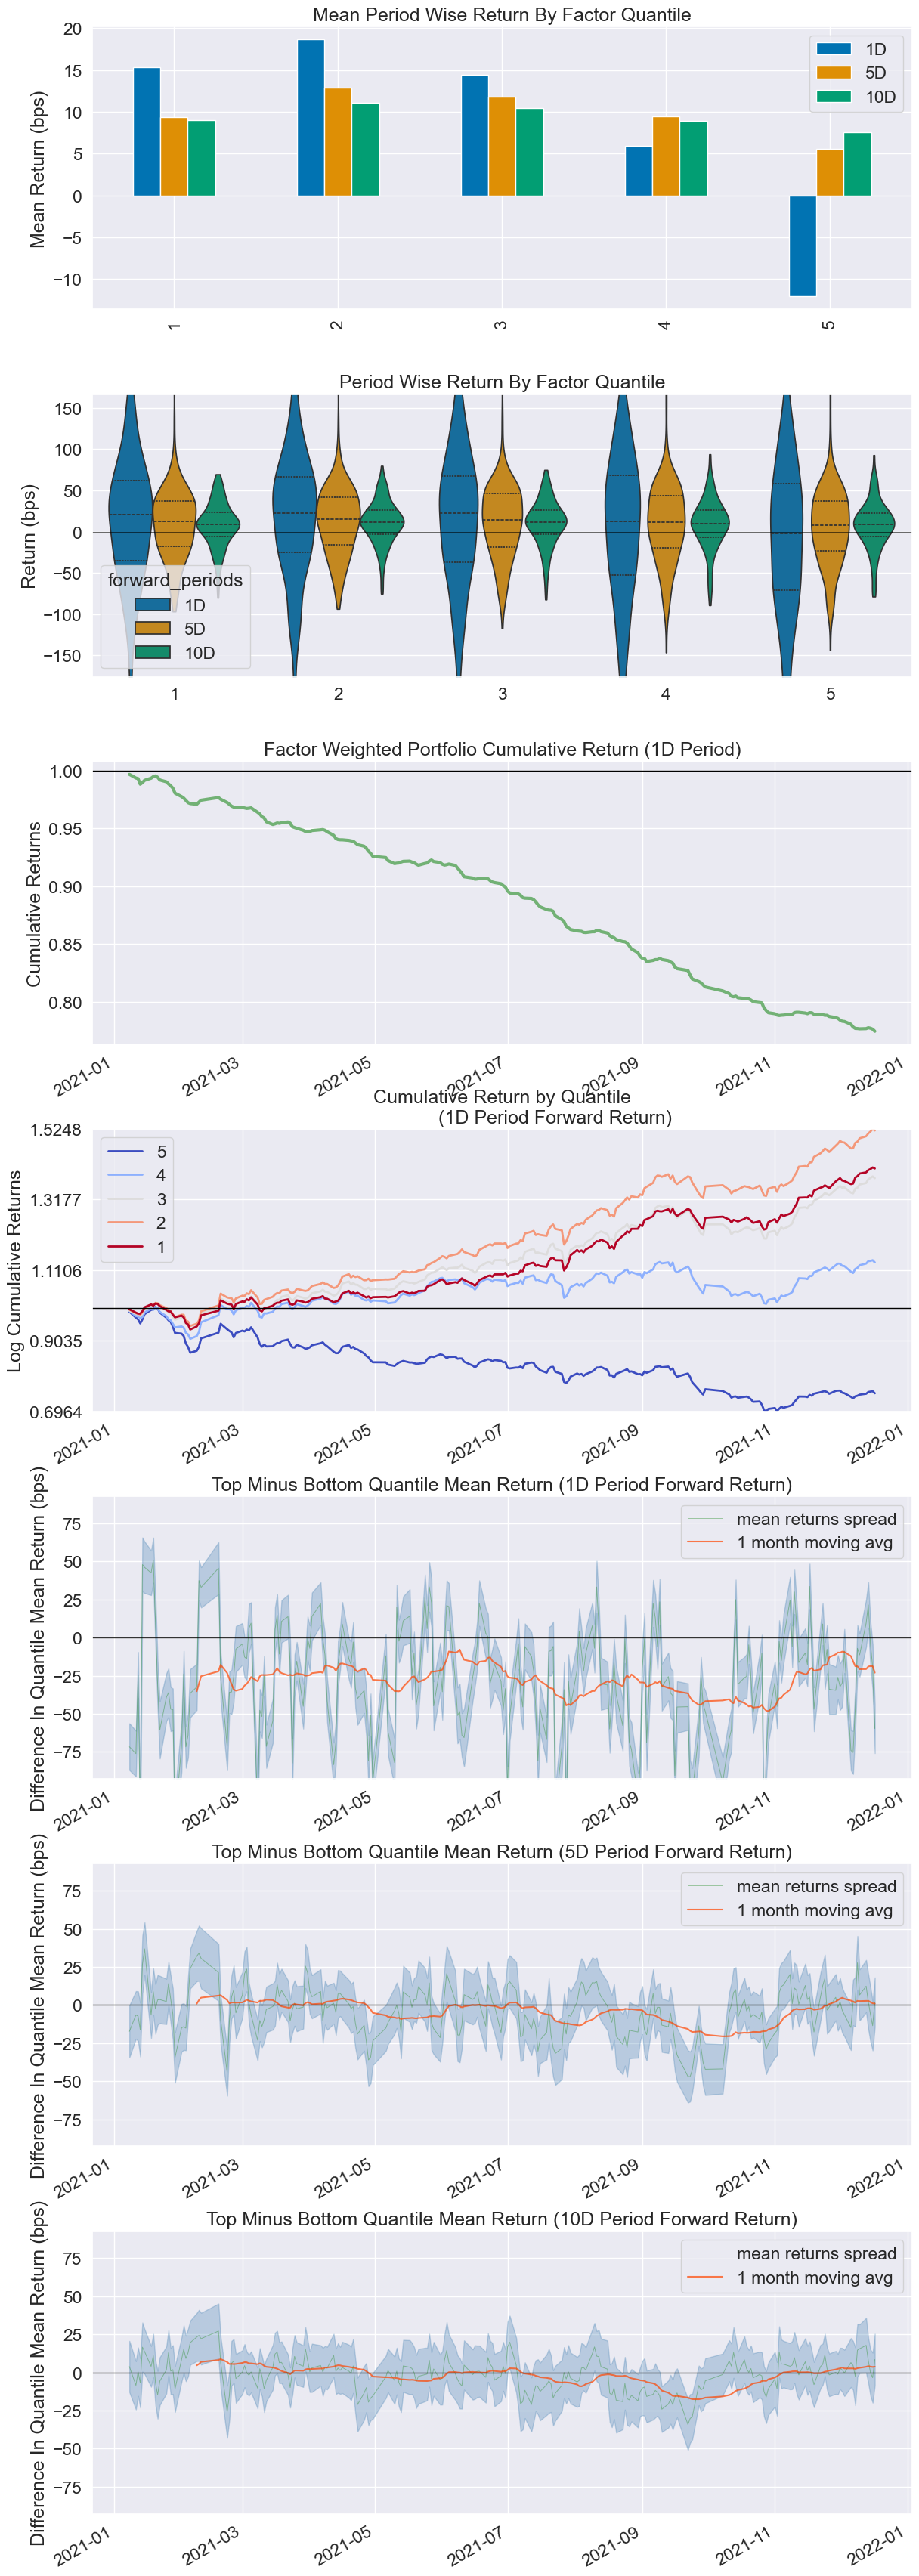

In [25]:
al.tears.create_returns_tear_sheet(factor_data,
                                   long_short=False,
                                   group_neutral=False)

## 14.获取收益序列

In [26]:
mean_quant_ret_bydate, std_quant_daily = perf.mean_return_by_quantile(
    factor_data, by_date=True, by_group=False, demeaned=False
)

In [27]:
mean_quant_rateret_bydate = mean_quant_ret_bydate.apply(
    al.utils.rate_of_return,
    axis=0,
    base_period=mean_quant_ret_bydate.columns[0],
)
mean_quant_rateret_bydate

1D        5D       10D
factor_quantile date                                    
1               2021-01-08 -0.003692 -0.002559  0.001116
                2021-01-11 -0.010082  0.001473  0.001577
                2021-01-12 -0.002971  0.005232  0.000596
                2021-01-13 -0.000184  0.005803  0.000660
                2021-01-14  0.007747  0.006585 -0.000172
...                              ...       ...       ...
5               2021-12-13  0.003391  0.002017  0.001224
                2021-12-14  0.007028  0.001202  0.000844
                2021-12-15  0.001637  0.001421 -0.000293
                2021-12-16  0.001449  0.000054  0.000172
                2021-12-17 -0.008190 -0.000750  0.001192

[1145 rows x 3 columns]

In [28]:
mean_quant_rateret_bydate.to_csv('mean_quant_rateret_bydate016.csv')

## 15.换手率分析

Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.387,0.778,0.789
Quantile 2 Mean Turnover,0.594,0.790,0.798
Quantile 3 Mean Turnover,0.636,0.799,0.801
Quantile 4 Mean Turnover,0.600,0.781,0.791
Quantile 5 Mean Turnover,0.463,0.775,0.788


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.656,0.07,0.037


<Figure size 640x480 with 0 Axes>

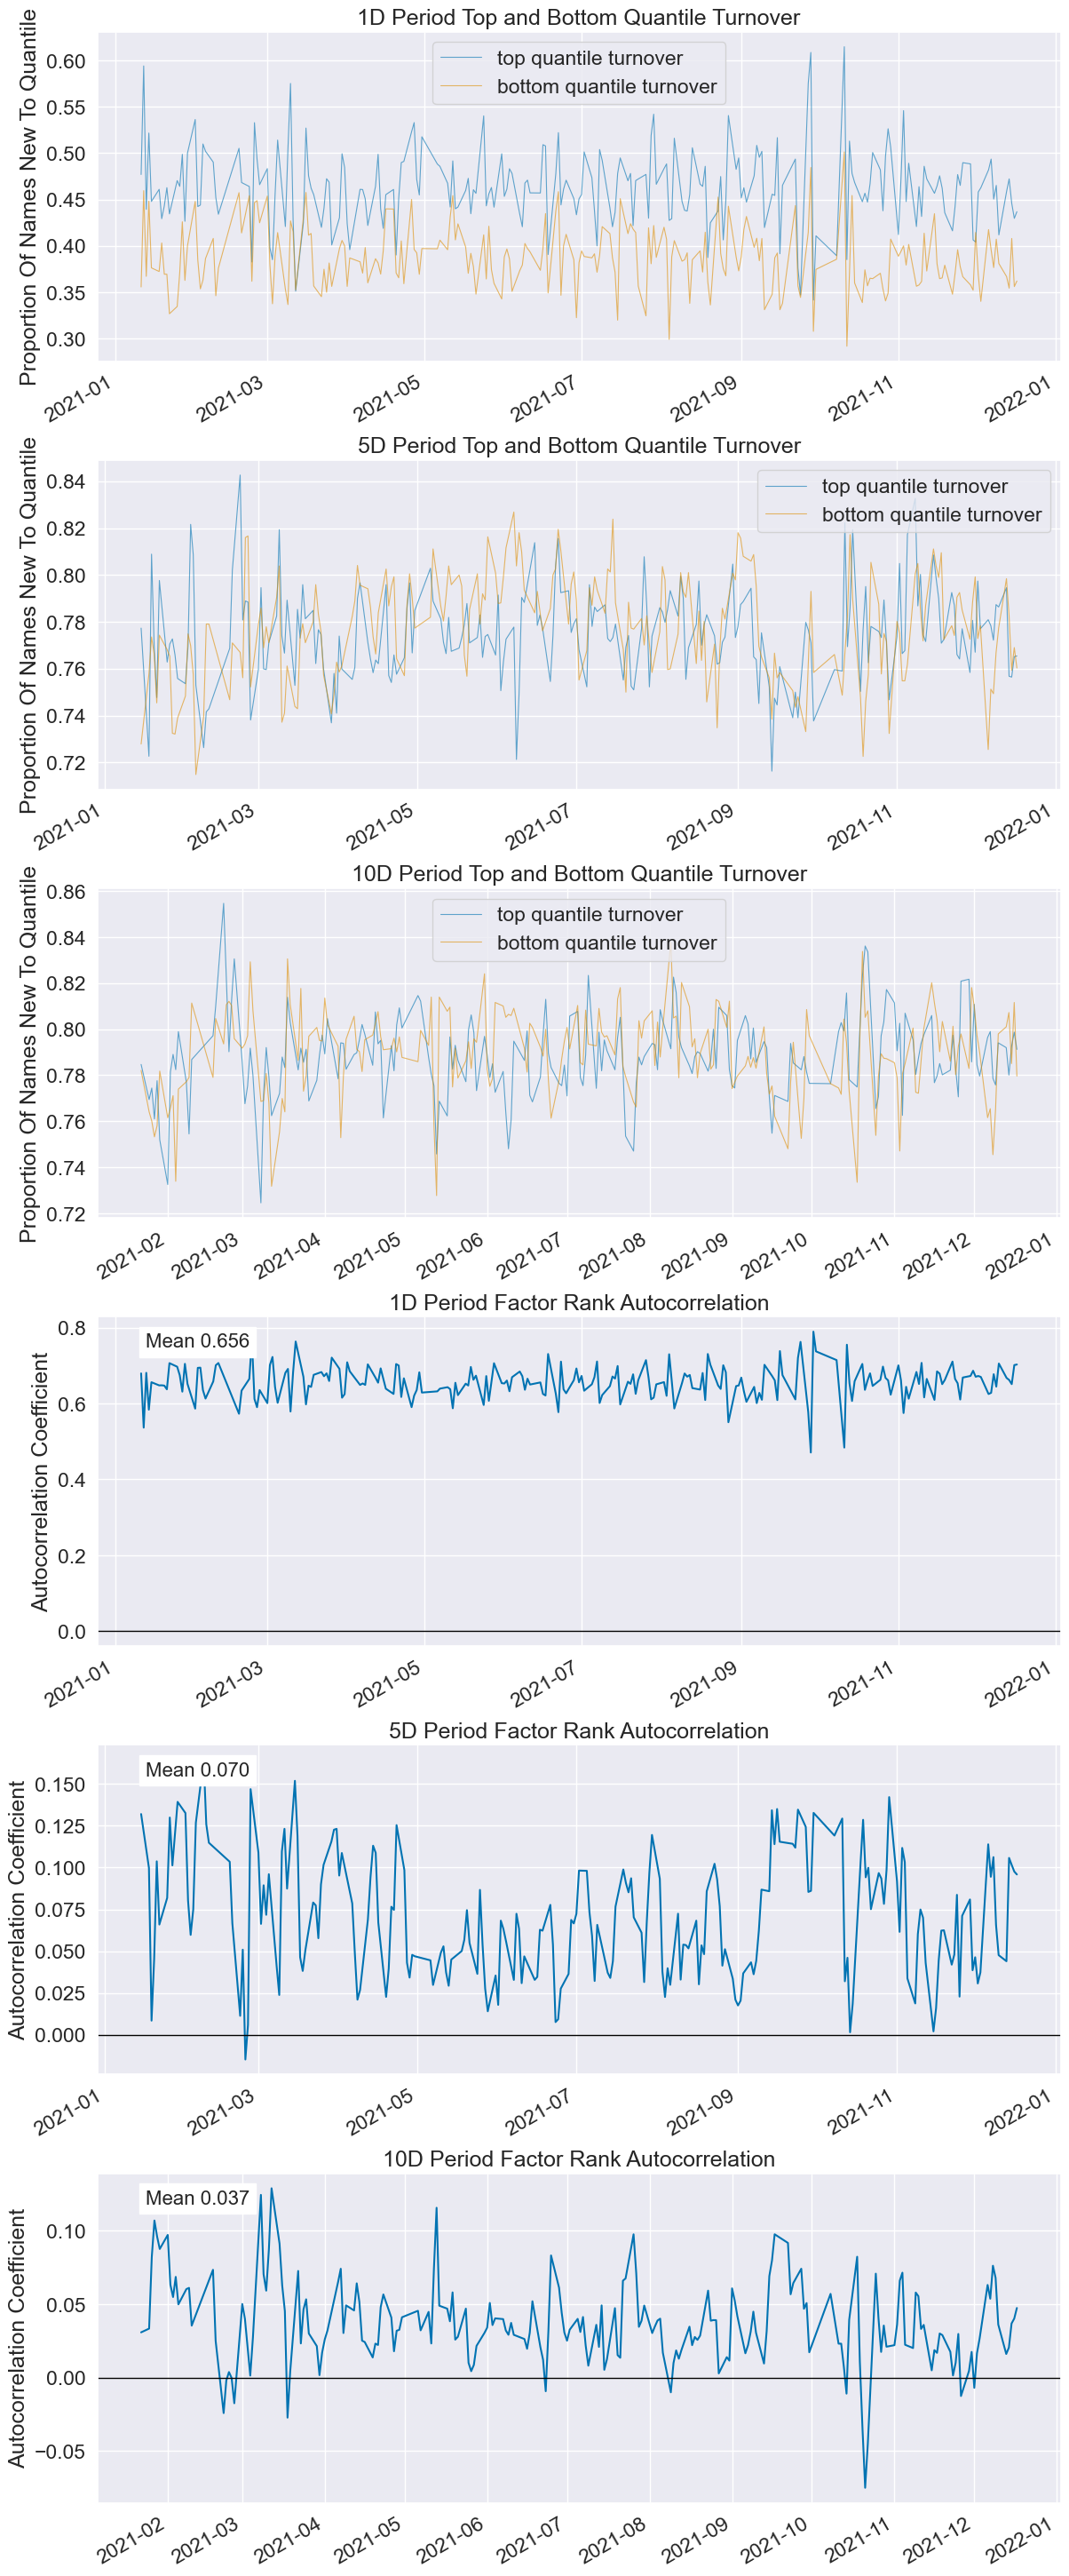

In [28]:
al.tears.create_turnover_tear_sheet(factor_data,turnover_periods=['1D','5D','10D'])